# statsmodels Principal Component Analysis

*Key ideas:* Principal component analysis, world bank data, fertility

In this notebook, we use principal components analysis (PCA) to analyze the time series of fertility rates in 192 countries, using data obtained from the World Bank.  The main goal is to understand how the trends in fertility over time differ from country to country.  This is a slightly atypical illustration of PCA because the data are time series.  Methods such as functional PCA have been developed for this setting, but since the fertility data are very smooth, there is no real disadvantage to using standard PCA in this case.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.multivariate.pca import PCA

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

The data can be obtained from the [World Bank web site](http://data.worldbank.org/indicator/SP.DYN.TFRT.IN), but here we work with a slightly cleaned-up version of the data:

In [2]:
data = sm.datasets.fertility.load_pandas().data
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,NaN,NaN
1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,NaN,NaN
3,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.316,7.354,7.385,7.410,7.425,7.430,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,NaN,NaN
4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.186,6.076,5.956,5.833,5.711,5.594,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,NaN,NaN


Here we construct a DataFrame that contains only the numerical fertility rate data and set the index to the country names.  We also drop all the countries with any missing data.

In [3]:
columns = list(map(str, range(1960, 2012)))
data.set_index("Country Name", inplace=True)
dta = data[columns]
dta = dta.dropna()
dta.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,3.054,...,1.825,1.805,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690
Afghanistan,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,7.484,7.321,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395
Angola,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375,7.339,...,6.778,6.743,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099
Albania,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268,5.160,...,2.195,2.097,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748
United Arab Emirates,6.928,6.910,6.893,6.877,6.861,6.841,6.816,6.783,6.738,6.679,...,2.428,2.329,2.236,2.149,2.071,2.004,1.948,1.903,1.868,1.841


There are two ways to use PCA to analyze a rectangular matrix: we can treat the rows as the "objects" and the columns as the "variables", or vice-versa.  Here we will treat the fertility measures as "variables" used to measure the countries as "objects".  Thus the goal will be to reduce the yearly fertility rate values to a small number of fertility rate "profiles" or "basis functions" that capture most of the variation over time in the different countries.

The mean trend is removed in PCA, but its worthwhile taking a look at it.  It shows that fertility has dropped steadily over the time period covered in this dataset.  Note that the mean is calculated using a country as the unit of analysis, ignoring population size.  This is also true for the PC analysis conducted below.  A more sophisticated analysis might weight the countries, say by population in 1980.

(0.0, 51.0)

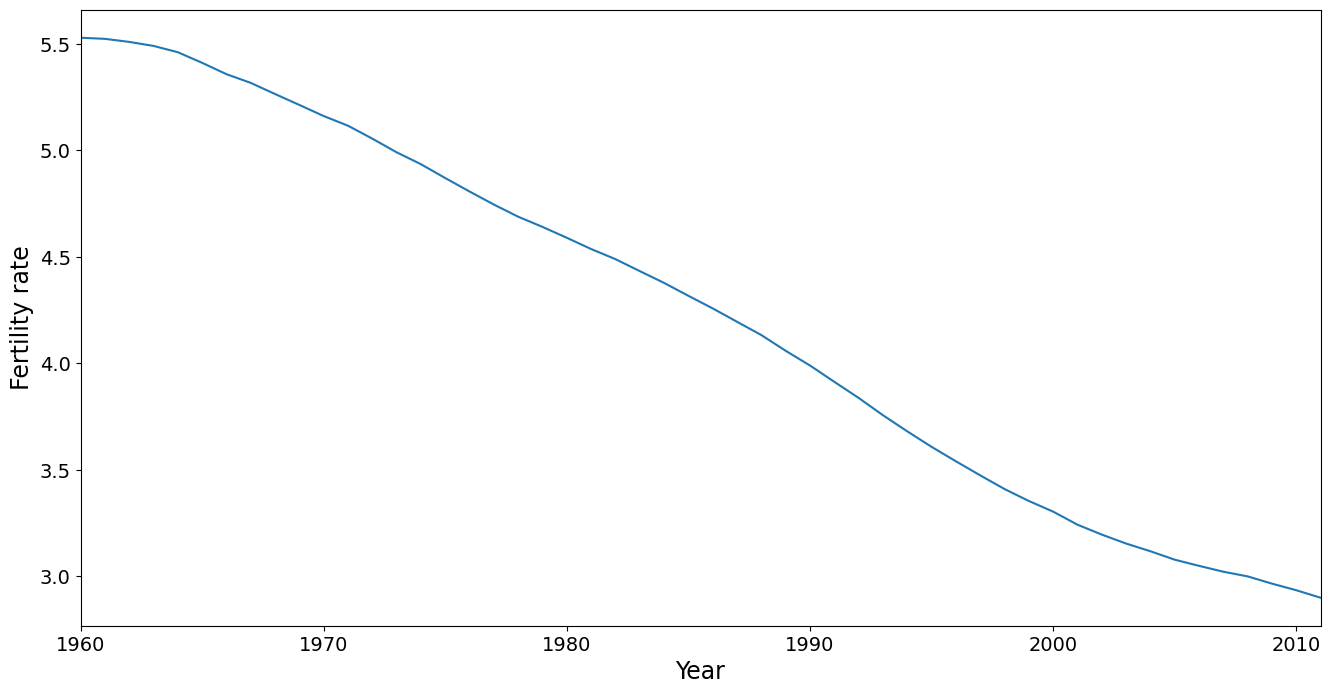

In [4]:
ax = dta.mean().plot(grid=False)
ax.set_xlabel("Year", size=17)
ax.set_ylabel("Fertility rate", size=17)
ax.set_xlim(0, 51)

Next we perform the PCA:

In [5]:
pca_model = PCA(dta.T, standardize=False, demean=True)

Based on the eigenvalues, we see that the first PC dominates, with perhaps a small amount of meaningful variation captured in the second and third PC's.

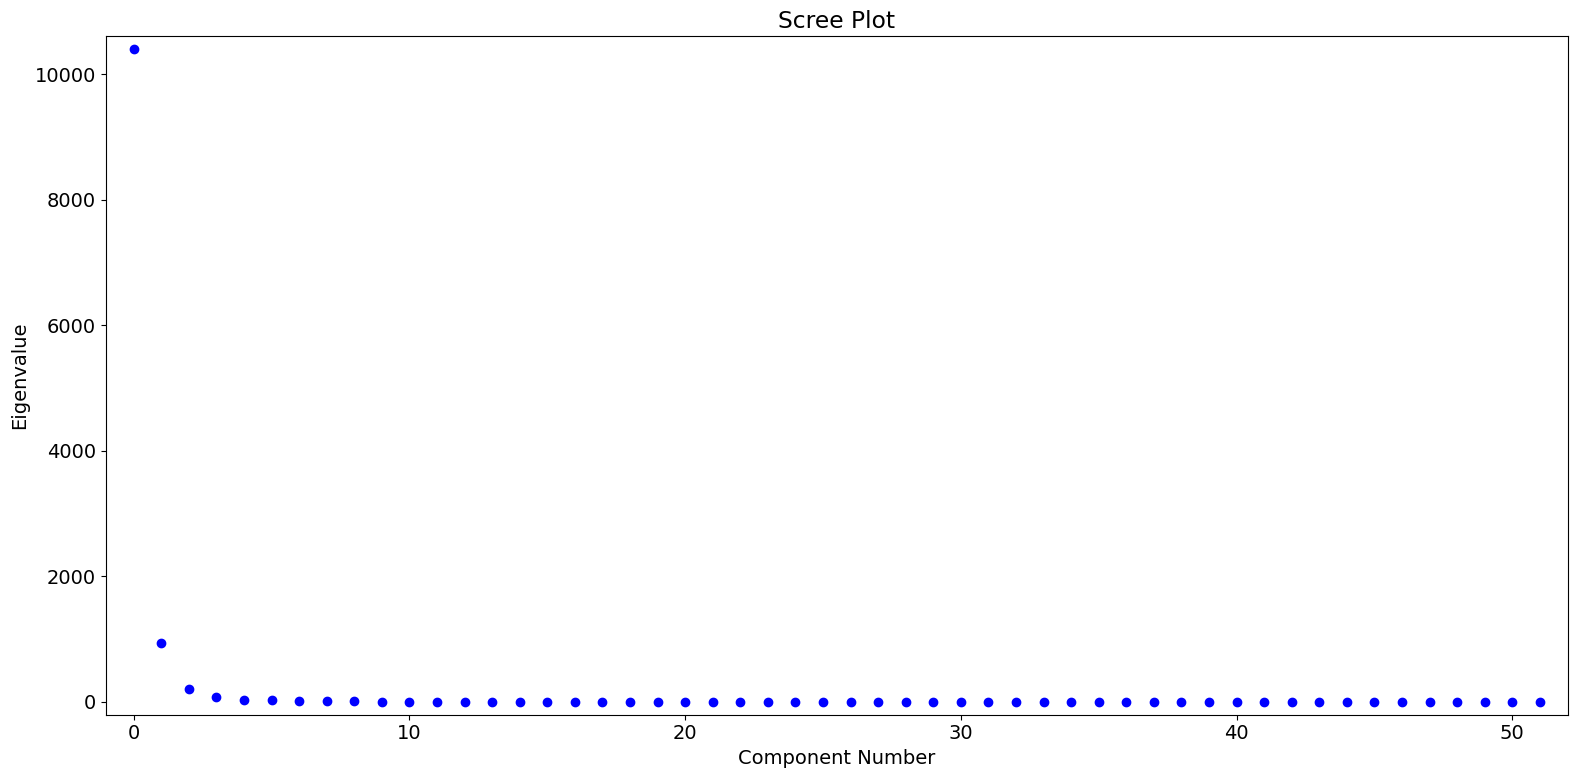

In [6]:
fig = pca_model.plot_scree(log_scale=False)

Next we will plot the PC factors.  The dominant factor is monotonically increasing.  Countries with a positive score on the first factor will increase faster (or decrease slower) compared to the mean shown above.  Countries with a negative score on the first factor will decrease faster than the mean.  The second factor is U-shaped with a positive peak at around 1985.  Countries with a large positive score on the second factor will have lower than average fertilities at the beginning and end of the data range, but higher than average fertility in the middle of the range.

/tmp/ipykernel_5590/427128218.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dta.columns.values[::10])


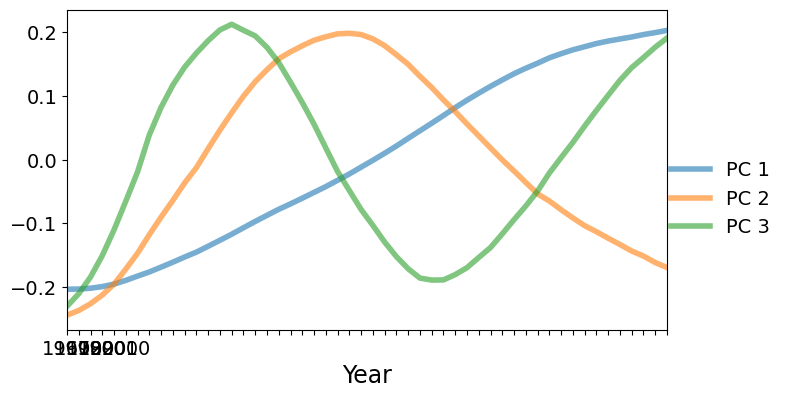

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
lines = ax.plot(pca_model.factors.iloc[:, :3], lw=4, alpha=0.6)
ax.set_xticklabels(dta.columns.values[::10])
ax.set_xlim(0, 51)
ax.set_xlabel("Year", size=17)
fig.subplots_adjust(0.1, 0.1, 0.85, 0.9)
legend = fig.legend(lines, ["PC 1", "PC 2", "PC 3"], loc="center right")
legend.draw_frame(False)

To better understand what is going on, we will plot the fertility trajectories for sets of countries with similar PC scores.  The following convenience function produces such a plot.

In [8]:
idx = pca_model.loadings.iloc[:, 0].argsort()

First we plot the five countries with the greatest scores on PC 1.  These countries have a higher rate of fertility increase than the global mean (which is decreasing).

In [9]:
def make_plot(labels):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax = dta.loc[labels].T.plot(legend=False, grid=False, ax=ax)
    dta.mean().plot(ax=ax, grid=False, label="Mean")
    ax.set_xlim(0, 51)
    fig.subplots_adjust(0.1, 0.1, 0.75, 0.9)
    ax.set_xlabel("Year", size=17)
    ax.set_ylabel("Fertility", size=17)
    legend = ax.legend(
        *ax.get_legend_handles_labels(), loc="center left", bbox_to_anchor=(1, 0.5)
    )
    legend.draw_frame(False)

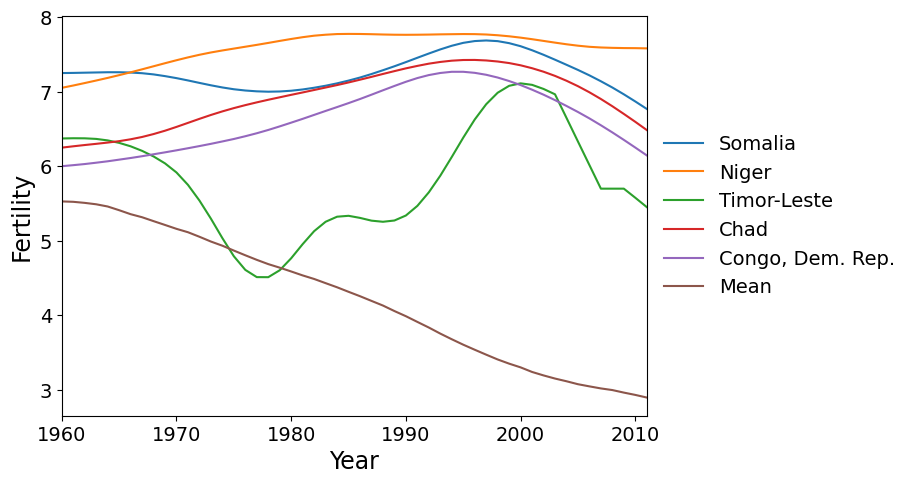

In [10]:
labels = dta.index[idx[-5:]]
make_plot(labels)

Here are the five countries with the greatest scores on factor 2.  These are countries that reached peak fertility around 1980, later than much of the rest of the world, followed by a rapid decrease in fertility.

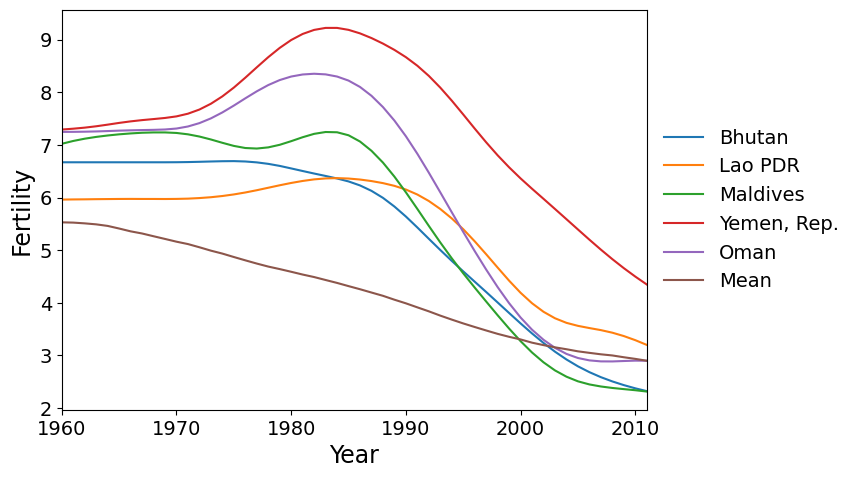

In [11]:
idx = pca_model.loadings.iloc[:, 1].argsort()
make_plot(dta.index[idx[-5:]])

Finally we have the countries with the most negative scores on PC 2.  These are the countries where the fertility rate declined much faster than the global mean during the 1960's and 1970's, then flattened out.

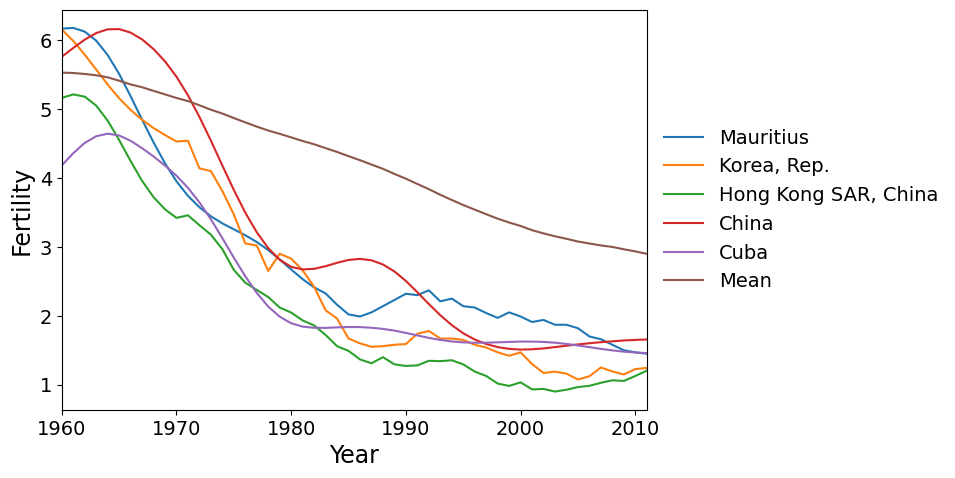

In [12]:
make_plot(dta.index[idx[:5]])

We can also look at a scatterplot of the first two principal component scores.  We see that the variation among countries is fairly continuous, except perhaps that the two countries with highest scores for PC 2 are somewhat separated from the other points.  These countries, Oman and Yemen, are unique in having a sharp spike in fertility around 1980.  No other country has such a spike.  In contrast, the countries with high scores on PC 1 (that have continuously increasing fertility), are part of a continuum of variation.

array(['Oman', 'Yemen, Rep.'], dtype=object)

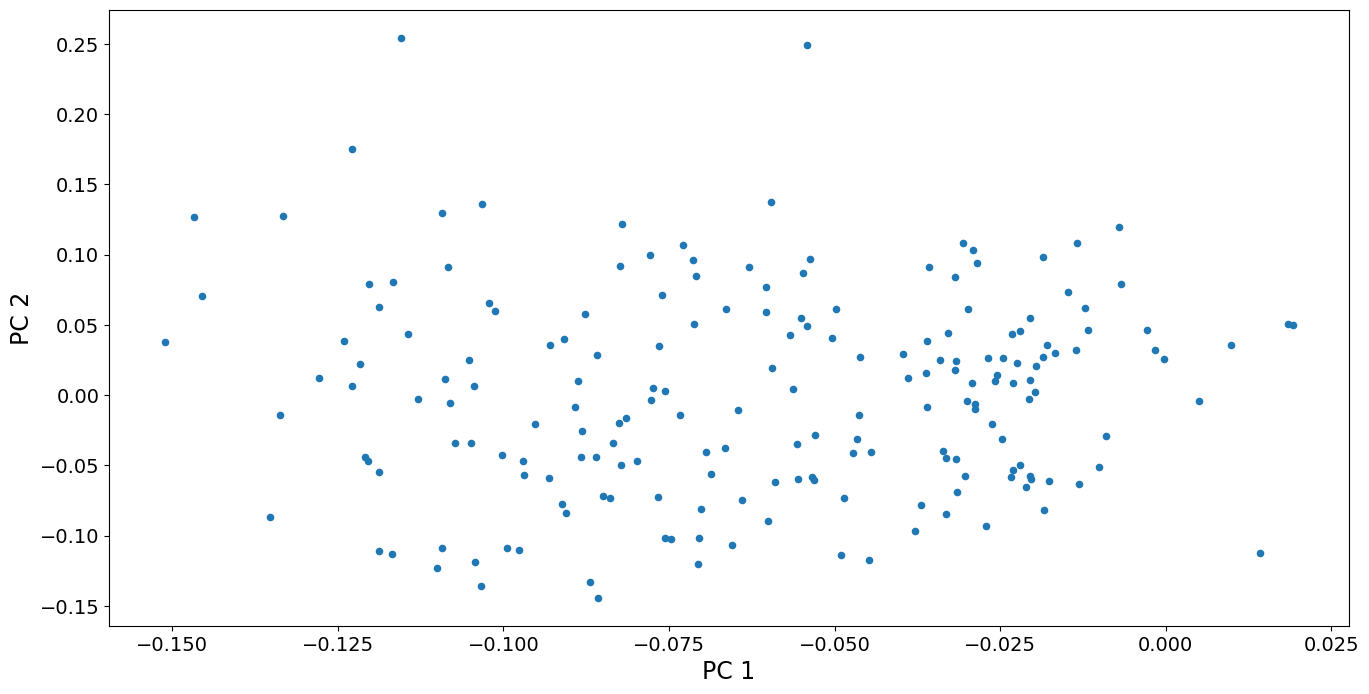

In [13]:
fig, ax = plt.subplots()
pca_model.loadings.plot.scatter(x="comp_00", y="comp_01", ax=ax)
ax.set_xlabel("PC 1", size=17)
ax.set_ylabel("PC 2", size=17)
dta.index[pca_model.loadings.iloc[:, 1] > 0.2].values